## Importing Libraries

In [97]:
# IMPORT LIB
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from pandas.plotting import scatter_matrix
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline
from sklearn.model_selection import train_test_split


## Importing the dataset

In [98]:
dataset = pd.read_csv("./dataset/dairy_dataset.csv")
dataset.head()

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,2022-02-17,5,Ice Cream,Dodla Dairy,222.40,85.72,...,2021-12-27,2022-01-21,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,2021-12-01,1,Milk,Amul,687.48,42.61,...,2021-10-03,2021-10-25,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,2022-02-28,4,Yogurt,Dodla Dairy,503.48,36.50,...,2022-01-14,2022-02-13,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,2019-06-09,3,Cheese,Britannia Industries,823.36,26.52,...,2019-05-15,2019-07-26,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.77,83.85,...,2020-10-17,2020-10-28,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40


# EDA + Descriptive Statistics

In [99]:
dataset.isnull().sum()

Location                               0
Total Land Area (acres)                0
Number of Cows                         0
Farm Size                              0
Date                                   0
Product ID                             0
Product Name                           0
Brand                                  0
Quantity (liters/kg)                   0
Price per Unit                         0
Total Value                            0
Shelf Life (days)                      0
Storage Condition                      0
Production Date                        0
Expiration Date                        0
Quantity Sold (liters/kg)              0
Price per Unit (sold)                  0
Approx. Total Revenue(INR)             0
Customer Location                      0
Sales Channel                          0
Quantity in Stock (liters/kg)          0
Minimum Stock Threshold (liters/kg)    0
Reorder Quantity (liters/kg)           0
dtype: int64

There's no null data in the dataset.

### Categorical attributes

In [100]:
dataset.describe()

,Total Land Area (acres),Number of Cows,Product ID,Quantity (liters/kg),Price per Unit,Total Value,Shelf Life (days),Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
count,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.00000,4325.000000,4325.000000,4325.000000,4325.000000
mean,503.483073,54.963699,5.509595,500.652657,54.785938,27357.845411,29.127630,248.095029,54.77914,13580.265401,252.068671,55.826143,109.107820
std,285.935061,26.111487,2.842979,288.975915,26.002815,21621.051594,30.272114,217.024182,26.19279,14617.009122,223.620870,26.301450,51.501035
min,10.170000,10.000000,1.000000,1.170000,10.030000,42.516500,1.000000,1.000000,5.21000,12.540000,0.000000,10.020000,20.020000
25%,252.950000,32.000000,3.000000,254.170000,32.460000,9946.814500,10.000000,69.000000,32.64000,2916.650000,66.000000,32.910000,64.280000
50%,509.170000,55.000000,6.000000,497.550000,54.400000,21869.652900,22.000000,189.000000,54.14000,8394.540000,191.000000,56.460000,108.340000
75%,751.250000,77.000000,8.000000,749.780000,77.460000,40954.441000,30.000000,374.000000,77.46000,19504.550000,387.000000,79.010000,153.390000
max,999.530000,100.000000,10.000000,999.930000,99.990000,99036.369600,150.000000,960.000000,104.51000,89108.900000,976.000000,99.990000,199.950000


In [101]:
cat_f = dataset.select_dtypes("object")
cat_f.columns

Index(['Location', 'Farm Size', 'Date', 'Product Name', 'Brand',
       'Storage Condition', 'Production Date', 'Expiration Date',
       'Customer Location', 'Sales Channel'],
      dtype='object')

In [102]:
cat_f.describe()

,Location,Farm Size,Date,Product Name,Brand,Storage Condition,Production Date,Expiration Date,Customer Location,Sales Channel
count,4325,4325,4325,4325,4325,4325,4325,4325,4325,4325
unique,15,3,1278,10,11,5,1405,1441,15,3
top,Delhi,Large,2021-01-28,Curd,Amul,Refrigerated,2022-09-06,2022-02-01,Delhi,Retail
freq,525,1462,11,479,1053,2459,9,9,499,1478


In [103]:
cat_f.count()

Location             4325
Farm Size            4325
Date                 4325
Product Name         4325
Brand                4325
Storage Condition    4325
Production Date      4325
Expiration Date      4325
Customer Location    4325
Sales Channel        4325
dtype: int64

### Numerical attributes

In [104]:
num_f = dataset.select_dtypes("number")
num_f.columns

Index(['Total Land Area (acres)', 'Number of Cows', 'Product ID',
       'Quantity (liters/kg)', 'Price per Unit', 'Total Value',
       'Shelf Life (days)', 'Quantity Sold (liters/kg)',
       'Price per Unit (sold)', 'Approx. Total Revenue(INR)',
       'Quantity in Stock (liters/kg)', 'Minimum Stock Threshold (liters/kg)',
       'Reorder Quantity (liters/kg)'],
      dtype='object')

In [105]:
fig = make_subplots(rows=4, cols=4)
for i, column in enumerate(num_f.columns):
    row = i // 4 + 1
    col = i % 4 + 1
    trace = go.Histogram(x=num_f[column], name=column)
    fig.add_trace(trace, row=row, col=col)
fig.show()

### Outliers

In [112]:
fig = make_subplots(rows=4, cols=4)
for i, column in enumerate(num_f.columns):
    row = i // 4 + 1
    col = i % 4 + 1
    trace = go.Box(x=num_f[column], name=column)
    fig.add_trace(trace, row=row, col=col)
fig.show()

From the result, we can see that Quantity Sold and Shelf Life contains a lot of outliers. But for the purpose of demonstrating Robust Scaling, we're not removing the outliers.

## Sunburst Chart

In [ ]:
product_by_brand = cat_f.groupby(["Product Name", "Brand"]).size().reset_index(name="Count")
fig2 = px.sunburst(product_by_brand,
                    path=["Brand", "Product Name"],
                    values="Count",
                    title="Sunburst charts of products by brand"
                    )
fig2.show()

From here, we can see the advantages of a sunburst chart. We can tell which brand make which product in one chart quite intuitively. As opposed to the alternative.

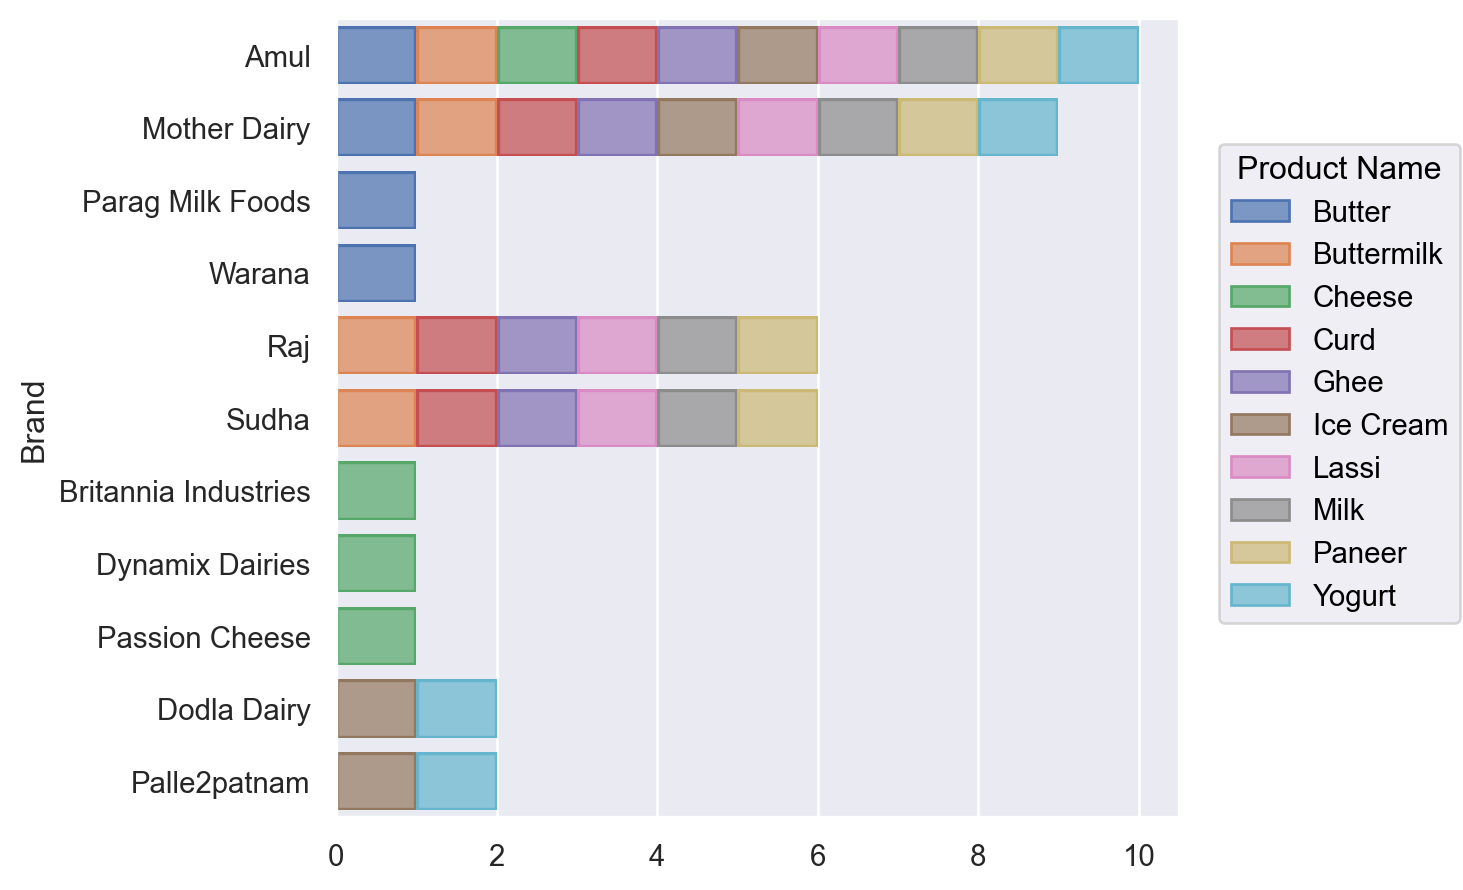

In [ ]:
so.Plot(product_by_brand, color="Product Name", y="Brand").add(so.Bar(), so.Count(), so.Stack())


In [ ]:
product_by_size_loc = cat_f.groupby(["Location", "Farm Size", "Product Name"]).size().reset_index(name="Count")
fig1 = px.sunburst(product_by_size_loc,
                    path=["Location", "Farm Size", "Product Name"],
                    values="Count",
                    title="Sunburst charts of products by location and farm size"
                    )
fig1.show()

For this chart, it'd be impossible to plot in all of these attributes in one traditional bar/pie chart.

# Data Pre-processing